In [1]:
# Ziel: Fidelity für 1 Qubit zu untersuchen
# Methode: JCM im disspersiven Regime
# Masterarbeit 021020 33ff

%matplotlib inline
from qutip import *
import matplotlib.pyplot as plt
import numpy as np
import math
import scipy
from scipy.special import gamma, factorial

In [2]:
def odd (n):
    if (n % 2) == 0:
        return 0
    else:
        return 1

In [3]:
# Parameter difinieren

N = 21
xi = .39 #GHz
m = 1/(4 * xi**2)
omega_qfp = 2 * xi
eta = m * omega_qfp
toq = 0.1
toqfp = 1/toq
omega_q = toq * omega_qfp
delta = 0.2 * omega_qfp # Verstimmung

# operator
zus0 = basis(2,0)
zus1 = basis(2,1)
a = tensor(qeye(2), destroy(N))
sz = tensor(sigmaz(), identity(N))
sx = tensor(sigmax(), identity(N))

psi0_q = (zus0 + zus1).unit()
rho0_q = ket2dm(psi0_q)

In [4]:
def parameter(theta, rdg):
    
    g = delta/rdg # rgo: [5, 8]
    
    Delta_q = np.sin(theta) * omega_q
    Delta_eff = Delta_q * np.exp(-eta)
    epsilon = np.cos(theta) * omega_q

    omega_q_eff = np.sqrt(Delta_eff**2 + epsilon**2)
    
    theta_eff = np.arctan(Delta_eff/epsilon)
    
    omega_qfp_eff = np.sqrt((toqfp*Delta_eff)**2 + (toqfp*epsilon)**2)
    
    chi = g**2 * np.sin(theta_eff)**2 / delta
    
    return (chi, theta_eff)

In [5]:
theta_list = np.linspace(np.pi/20, np.pi, 1000)

In [48]:
chi1_list = []
for theta in theta_list:
    rdg = 8
    (chi, theta_eff) = parameter(theta_list, rdg)
    chi1_list.append(chi/omega_qfp)

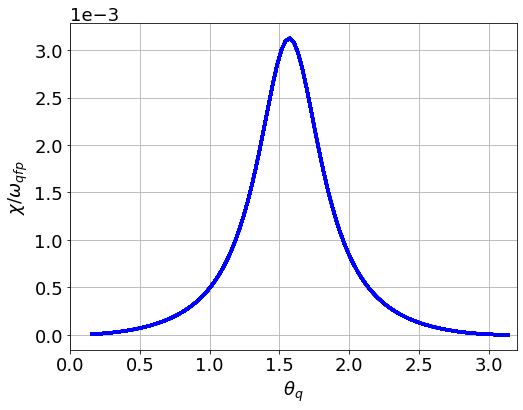

In [49]:
from pylab import rcParams
rcParams.update({'font.size': 18})
rcParams['figure.figsize'] = 8, 6
fig, ax = plt.subplots()

ax.plot(theta_list, np.array(chi1_list).T, 'b', linewidth=3)

ax.set_xlabel(r'$\theta_q$')
ax.set_ylabel(r'$\chi/\omega_{qfp}$')
ax.set_xlim(0, 3.2)
ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax.grid(True)
plt.savefig('1q_chi_theta.pdf')

In [50]:
chi2_list = []
rdg_list = np.linspace(5, 50, 100)
theta = np.pi/4
for rdg in rdg_list:
    (chi, theta_eff) = parameter(theta, rdg)
    chi2_list.append(chi/omega_qfp)

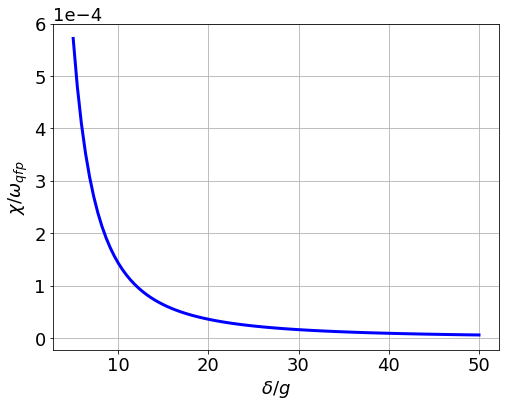

In [51]:
from pylab import rcParams
rcParams['figure.figsize'] = 8, 6
fig, ax = plt.subplots()

ax.plot(rdg_list, np.array(chi2_list).T, 'b', linewidth=3)

ax.set_xlabel(r'$\delta/g$')
ax.set_ylabel(r'$\chi/\omega_{qfp}$')
ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax.grid(True)
plt.savefig('1q_chi_delta.pdf')

In [52]:
chi_list = []
rdg_list = np.linspace(5, 50, 100)
theta_list = np.linspace(np.pi/20, np.pi, 100)
for rdg in rdg_list:
    for theta in theta_list:
        (chi, theta_eff) = parameter(theta, rdg)
        chi_list.append(chi/omega_qfp)

In [6]:
y = np.linspace(5, 10, 100) #rdg_list
x = np.linspace(np.pi/20, np.pi, 100) #theta_list

extent = np.min(x), np.max(x), np.min(y), np.max(y)

X, Y = np.meshgrid(x, y)

(Z, theta_eff) = parameter(X, Y)

RuntimeError: No mappable was found to use for colorbar creation. First define a mappable such as an image (with imshow) or a contour set (with contourf).

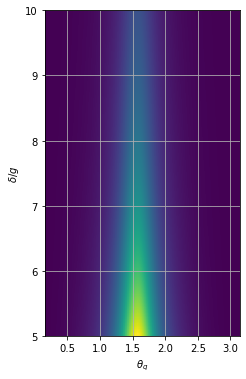

In [8]:
from pylab import rcParams
rcParams['figure.figsize'] = 8, 6
fig, ax = plt.subplots()

im = ax.imshow(Z, origin='lower', extent=extent)

ax.set_xlabel(r'$\theta_q$')
ax.set_ylabel(r'$\delta/g$')
ax.grid(True)
plt.savefig('1q_chi_g.pdf')
plt.colorbar()
# Meist du so? Wie kommt der Wert von Z, also $\chi$?
# Danke!
